<a href="https://colab.research.google.com/github/ggug0125-ui/AI_26/blob/main/03_01_k%EC%B5%9C%EA%B7%BC%EC%A0%91%EC%9D%B4%EC%9B%83%ED%9A%8C%EA%B7%80%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 이번에는 여름에 농어철로 농어 주문이 크게 늘어서
# MBC마켓에서 업계최초로 농어를 무게 단위로 판매하려 함
# 무게 단위로 판매를 하면 가격 측정도 원할하고
# 고객도 합리적으로 판단을 할 수 있다.
# 그런데 공급처에서 생선 무게를 잘못 측정해서 보낼 수도 있다.

# 농어의 무게를 재 측정해야 한다.
# 다른 데이터는 정상범위가 있으니 예측할 수 있을까?
# 이렇게 예측하는 것을 회귀라고 한다.
# 샘플 데이터가 필요하겠군!
# 외부에서 56개의 샘플을 받아서 처리해보자.
# 지도학습은 크게로 2가지로 나누어 짐

# 분류 (2진분류) : from sklearn.neighbors import KNeighborsClassifier
# 회귀 (예측 : 확률(임의의 어떤 숫자로 예측)
#                : from sklearn.neighbors import KNeighborsRegressor
# 회귀 : 두 변수 사이에 상관관계를 분석하는 방법

In [2]:
# 리눅스 명령어로 코랩의 가상머신에 나눔폰트를 설치하고 적용하는 명령어
# 차트에 한글처리 용
!sudo apt-get install -y fonts-nanum    # !sudo 가상머신 명령어 처리(관리자권한)
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf # 설치 후에 세션 다시시작!

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 2 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,215 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 117540 files and direc

In [2]:
# 농어의 샘플자료 56개
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0]) # 농어의 길이 배열리스트
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0]) # 농어의 무게 배열리스트

기초자료


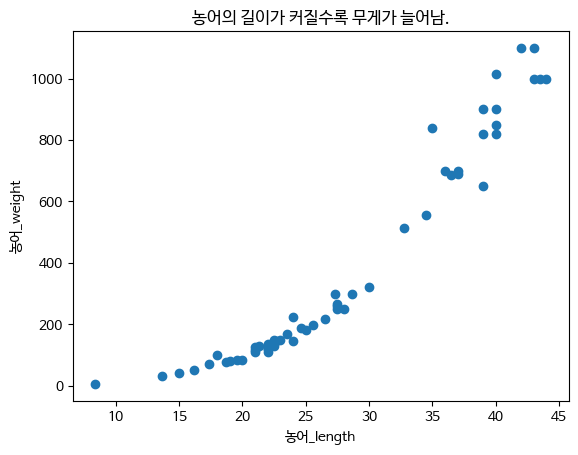

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') # 한글처리

plt.scatter(perch_length, perch_weight) # 농어의 길이(x축), 농어의 무게(y축)
plt.xlabel('농어_length')
plt.ylabel('농어_weight')
print('기초자료')
plt.title('농어의 길이가 커질수록 무게가 늘어남.')
plt.show()

# 산점도를 그리고 나니 길이가 커짐에 따라 무게도 늘어남
# 이 데이터를 토대로 훈련(.fit)과 테스트 (scaore)를 진행해보자

In [ ]:
# k-최근접 이웃 알고리즘에서의 회귀 KNeighborsRegressor
# 예측하려는 샘플에 가장 가까운 샘플 k개를 선택한다.
# 이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측함
# k=3이라고 가정하면 2개의 다수가 있어 분류는 사각형으로 판단
# 회귀는 샘플에 가장 가까운 샘플 k를 선택
# 타겟값 100, 80, 60을 더해 3으로 나눈 평균이 타겟 값으로 사용됨

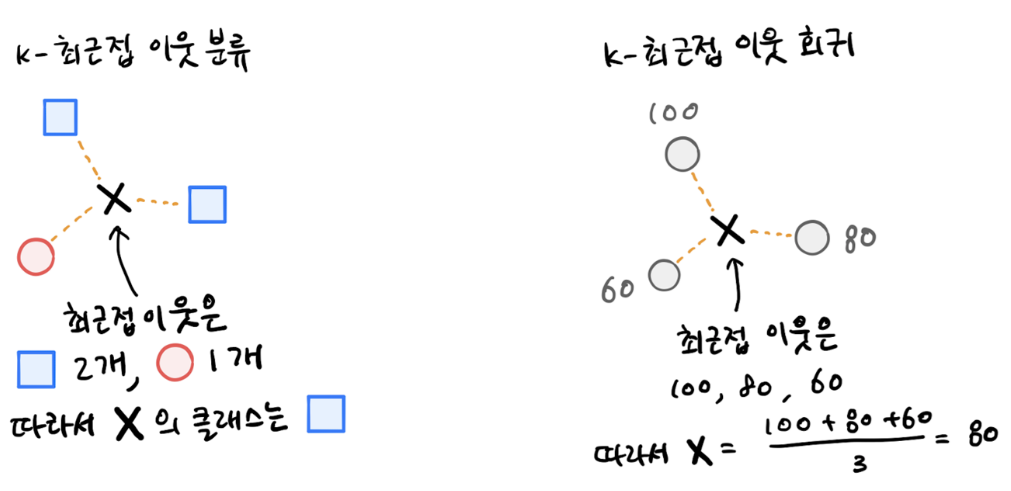

In [4]:
# 사이킷런에서 제공하는 훈련세트, 테스트세트 생성
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42) # 1줄로 쓸것을 권장함
#                                                                       input          target
# stratify 사용하지 않음 (분류용)-> 정답파일이 무게 확율이기 때문에
# 사이킷런의 train_teat_split 함수를 사용해 훈련세트와 테스트 세트로 나눔
# random_state=42 서로 같은 테스트를 위해 시드값 제공

# 사이킷런에 사용할 훈련 세트는 2차원 배열을 사용함
# perch_length가 1차원 배열이기 때문에 이를 나눈 train_input과 test_input도 1차원 배열임
# [3,] -> [3,1] 2차원 배열을 사용해야 함으로 억지로 변환 reshape() 메서드 활용 (4,) -> (2,2)


In [5]:
test_array = np.array([1,2,3,4])
print(test_array.shape) # 현재 1차원 배열로 나오는데 이것을 억지로 2차원 배열 처리 해야함

(4,)


In [6]:
# 2차원 배열로 변환
test_array = test_array.reshape(2,2) #억지로 2차원 배열 만드는 기법
print(test_array.shape)
# 전에는 2개의 특성으로 사용했었기 때문에 자연스럽게 열이 2개인 2차원 배열을 사용했었지만
# 이번에는 특성이 1개로 수동으로 2차원 배열을 만들어야함 -> 넘파이. reshape()를 활용
# (4,) - > (2,2) 크기로 바꿔줌

(2, 2)


In [7]:
print(test_array)

[[1 2]
 [3 4]]


In [8]:
# 입력데이터인 train_input과 test_input을 2차원 배열로 바꾸어야함
# train_input (42,)->(42,1) -> train_input. reahape(42,1)
# 넘파이는 배열의 크기를 자동으로 지정하는 기능도 제공 (-1)값을 넣으면 된다.

train_input = train_input.reshape(-1, 1) # -1 지정하면 원소 개수로 모두 채우라는 의미
                                         # 1 은 두번째 크기를 1로
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape) # -1을 사용하면 매번 원소의 크기를 외우지 않아도 됨

(42, 1) (14, 1)


In [9]:
print(train_input)  # 전처리 끝

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]


In [10]:
# 훈련 시작
from sklearn.neighbors import KNeighborsRegressor #회귀 알고리즘용 구현 클래스 (리그레스)
# from sklearn.neighbors import KNeighborsClassifier 이건 분류용

knr = KNeighborsRegressor() # 회귀용 객체 생성
# k-최근접 이웃 회귀 모델을 훈련합니다.
knr.fit(train_input, train_target) #회귀용으로 훈련
#        농어의 길이   농어의 무게

KNeighborsRegressor()

In [11]:
knr.score(test_input, test_target)
#      농어 테스트 길이, 테스트 무게
# 분류의 경우는 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율(정확도)-> 예측값

# 회귀인 경우에는 평가를 결정 계수라고 함. R^2
# R^2 = 1 = ((타겟 - 예측)^2의 합) / ((타겟 - 평균)^2의 합) 임
# 타겟의 평균 정도를 예측하는 수준 -> R^2는 0에 가까워지고, 예측이 타겟에 가까워지면 1에 가까운 값
# 결과 99.285%로 예측이 가능한 수준

0.992809406101064

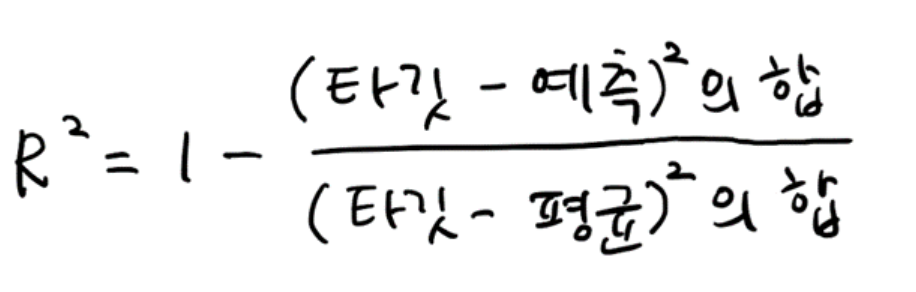

In [12]:
knr.predict([[15]])  # 알고 싶은 값 출력 15cm -> 60g
# k최근접한 5개의 이웃에 대한 값을 99.28% 확율로 나온 결과 (60g)

array([60.])

In [13]:
# sklearn.metrics 패키지 아래 여러가지 측정도구를 제공함
# mean_absolute_error절대값 오차를 평균하여 반환
from sklearn.metrics import  mean_absolute_error # 평균으로 절대 값의 오차를 찾는 메서드

# 테스트 세트에 대한 예측(prediction)을 만듭니다.
test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
#테스트 세트에 대한 평균 절대값 오차를 계산 합니다.

print(mae)
# 19g 정도 타겟값과 다르다 (타겟과 예측한 값 사이의 차이)

19.157142857142862


In [14]:
print(knr.score(train_input,train_target)) # 훈련한 모델을 사용해 훈련세트 점수확인
# 훈련한 점수를 평가해보면 96.98% 정도 나온다

0.9698823289099254


In [15]:
knr.score(test_input,test_target) # 테스트세트로 평가를 돌려보면 99.28% 정도 나옴

0.992809406101064

In [16]:
# 위 결과를 보면 모델을 훈련 세트에 훈련하면 훈련세트에 잘맞는 모델이 만들어짐
# 이 모델을 훈련세트와 테스트세트에서 평가하면 두값중에 어느것이 높을까?

# 보통 훈련세트의 점수가 조금 더 높게 나옴
# 훈련세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁘면 과대 적합이라고 함
# 과소 적합 : 훈련세트보다 테스트 세트가 점수 높아???, 두점수가 모두 낮은 경우

# 사이킷 런의 알고리즘 기본값을 3개로 조절해 보자
# 사이킷 런의 k-최근접 이웃 기본값이 5인데 이것을 3으로 변경
# 이웃의 갯수를 3으로 설정합니다.
knr.n_neighbors = 3
# 모델을 다시 훈련합니다.
knr.fit(train_input, train_target)  #3개의 이웃용 생성 훈련
print(knr.score(train_input, train_target)) #훈련점수 보기 98.04%

0.9804899950518966


In [17]:
print(knr.score(test_input, test_target))  #이웃 개수 조정으로 과대,과소 적합 해결 97.46%

0.9746459963987609


In [19]:
knr.predict([[15]]) #알고 싶은값 출력 15cm - > 47.333333g
#5개의 이웃을 참고하는 것보다 3개를 참고하는 것이 더 좋은 결과가 나옴

array([47.33333333])

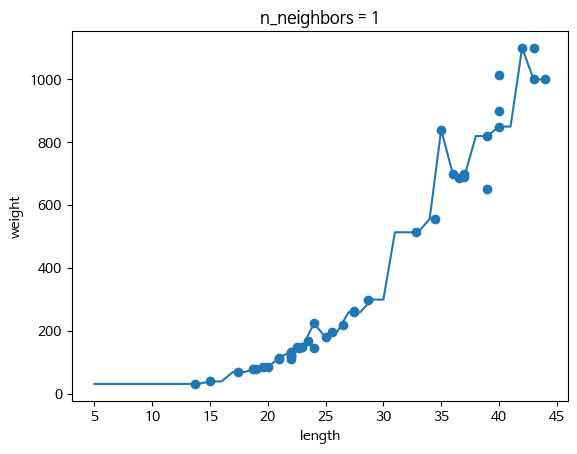

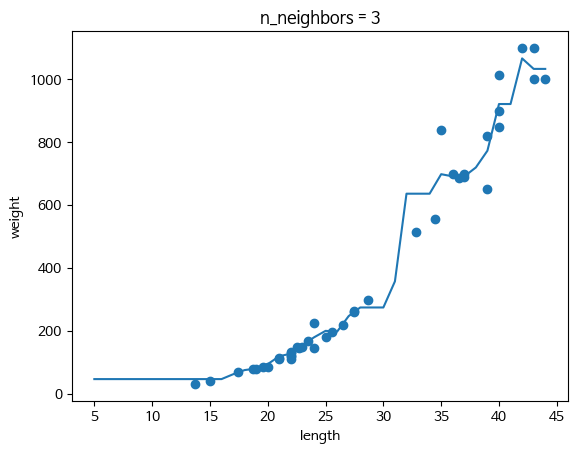

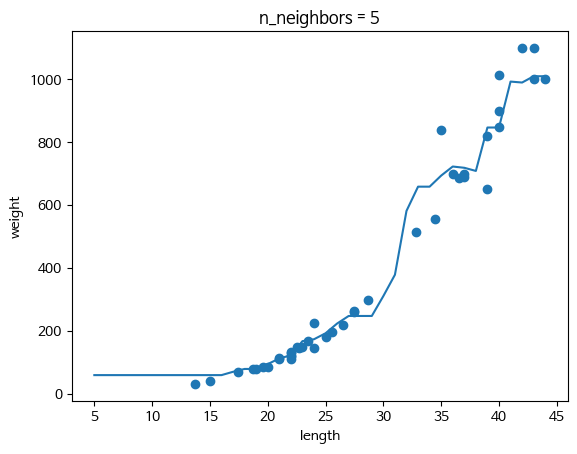

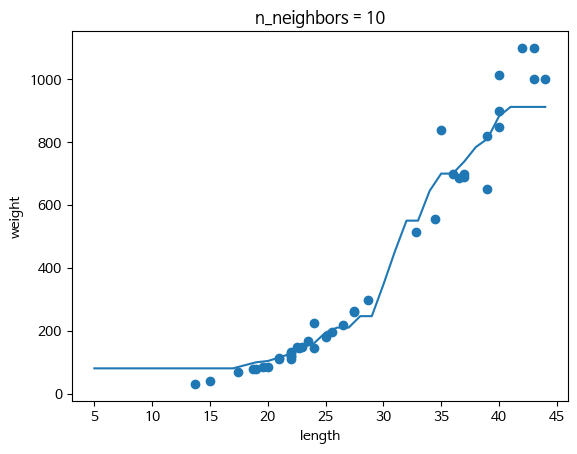

In [24]:
# 앞으로 훈련할 때 하이퍼파라미터(5->3 : 매개변수값) 변경으로 좋은 결과를 결정 할때 필수가 됨
# 이것을 보고서에 남겨서 선택한 결과를 표출해야 함
# 그런데 이것을 사람이 값을 수동으로 바꿔가면서 훈련을 하면 시간 낭비가 될 수 있음으로
# 파이썬의 for문 등을 많이 사용한다.
# 하이퍼파라미터 값은 대부분 홀수를 사용한다.(짝수인 경우에는 답이 잘 나오지 않음)

knr = KNeighborsRegressor() # k- 최근접 이웃 회귀 객체를 만듭니다.
# 5에서 45까지 x 죄표를 만듭니다.

x = np.arange(5,45).reshape(-1,1)
# n = 1, 3, 5, 10 일때 예측 결과를 그래프로 그립니다.
for n in [1,3,5,10]:
  # 모델훈련
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  # 지정한 범위 X에 대한 예측 구하기
  prediction = knr.predict(x)
  # 훈련 세트와 예측 결과 그래프 그리기
  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()
